Saving zdj4.jpg to zdj4.jpg
Dokładność klasyfikatora SVM: 1.00


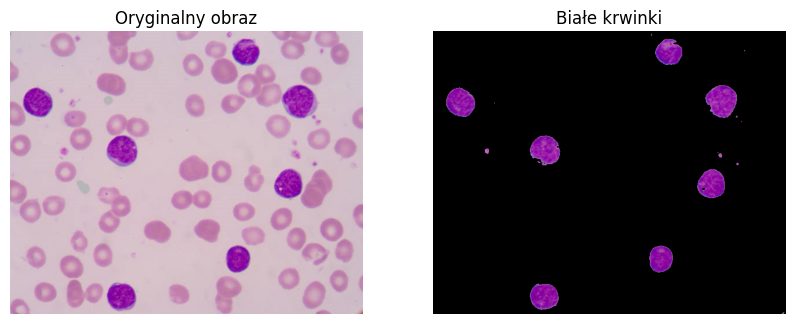

In [1]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()

#Wczytanie do OpenCV
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Konwersja obrazu do danych do klasyfikacji
pixels = image_hsv.reshape(-1, 3)

# Tworzenie etykiet na podstawie koloru fioletowego (zakres HSV)
lower_purple = np.array([130, 85, 90])
upper_purple = np.array([150, 255, 255])
mask = cv2.inRange(image_hsv, lower_purple, upper_purple)


labels = mask.flatten() // 255  # 1 dla fioletowych, 0 dla innych
X_train, X_test, y_train, y_test = train_test_split(
    pixels, labels, test_size=0.3, random_state=42
)

# Trenowanie
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

#Predykcja i ocena
y_pred = svm.predict(X_test)
print(f"Dokładność klasyfikatora SVM: {accuracy_score(y_test, y_pred):.2f}")

#Klasyfikacja
predicted_labels = svm.predict(pixels)
result_mask = predicted_labels.reshape(image.shape[:2]) * 255

#Tworzenie obrazu z maską
result_image = cv2.bitwise_and(image, image, mask=result_mask.astype(np.uint8))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Białe krwinki")
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


